In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table

In [2]:
col_1 = ['unit', 'time', 'op1', 'op2', 'op3']
col_2 = [f'sr{i+1}' for i in range(21)]
columns = col_1 + col_2

# Load datasets and assign column names
df = pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\train_FD003.txt', delim_whitespace=True, header=None, names=columns)
test = pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\test_FD003.txt', delim_whitespace=True, header=None, names=columns)

# Add features to training data
df['max_time'] = df.groupby('unit')['time'].transform('max')
df['remaining_time'] = df['max_time'] - df['time']
df['label'] = df['remaining_time'].clip(upper=130)

# Preview data
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8.4246,0.03,391,2388,100.0,39.11,23.3537,259,258,130
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8.4403,0.03,392,2388,100.0,38.99,23.4491,259,257,130
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8.3901,0.03,391,2388,100.0,38.85,23.3669,259,256,130
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8.3878,0.03,392,2388,100.0,38.96,23.2951,259,255,130
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8.3869,0.03,392,2388,100.0,39.14,23.4583,259,254,130


In [3]:
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

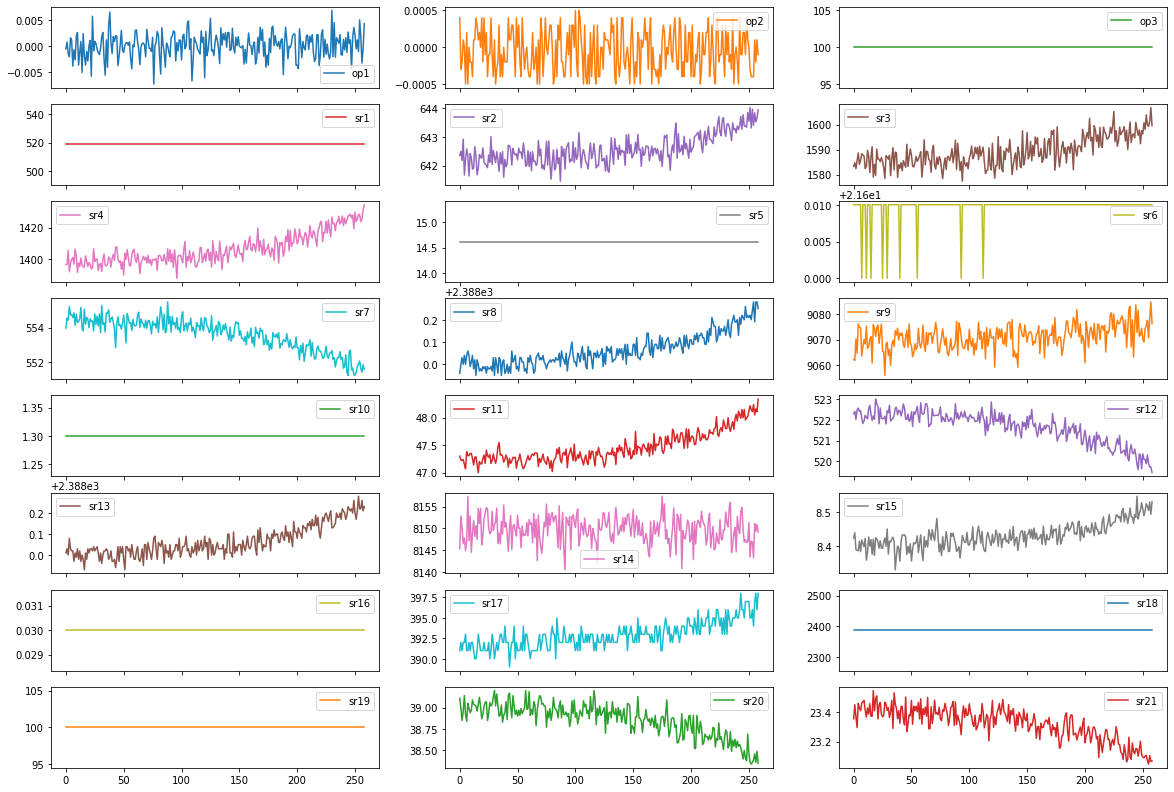

In [4]:
df_1=df[df['unit']==1].iloc[:,2:]
df_1[['op1', 'op2', 'op3','sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(8, 3))

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

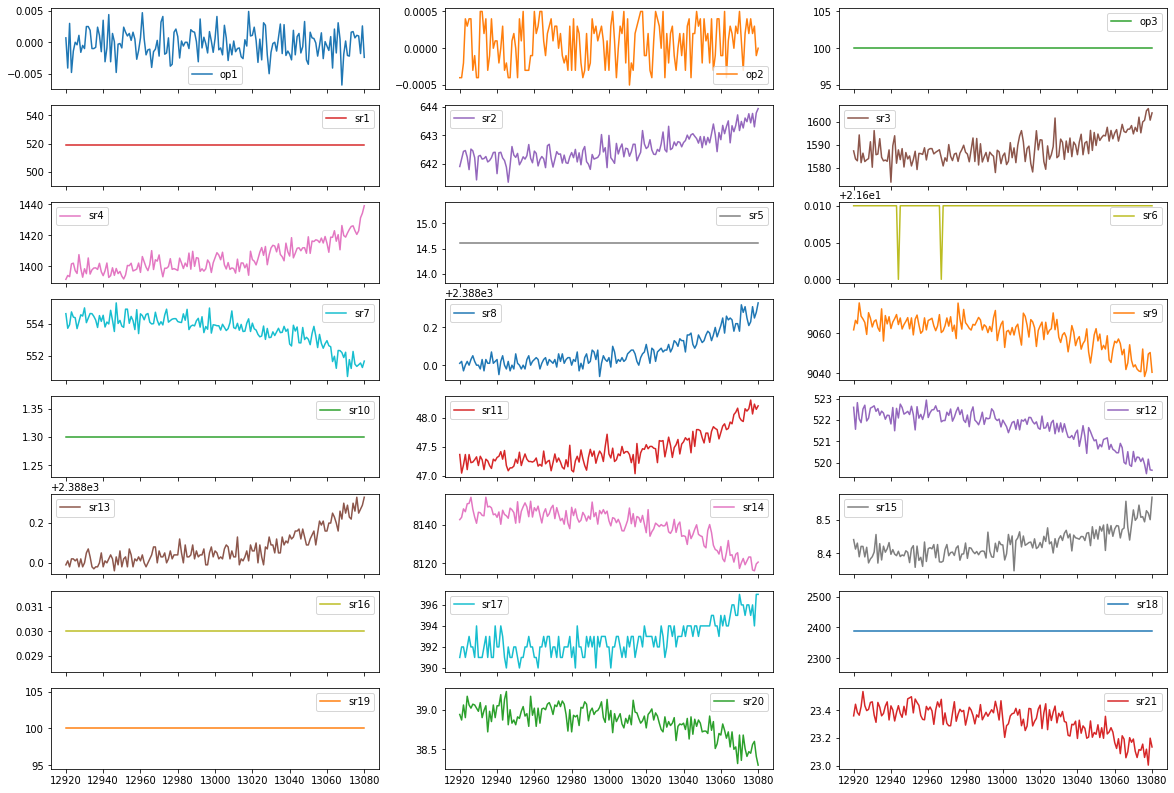

In [5]:
df_20=df[df['unit']==50].iloc[:,2:]
df_20[['op1', 'op2', 'op3','sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(8, 3))

In [6]:
window_size = 30

rolling_params = {
    "column_id": "unit",
    "column_sort": "time",
    "max_timeshift": window_size - 1,
    "min_timeshift": window_size-1,
    "rolling_direction": 1
}

rolled_df = roll_time_series(df, **rolling_params)

rolled_test = roll_time_series(test, **rolling_params)

Rolling: 100%|██████████| 60/60 [00:09<00:00,  6.08it/s]


In [7]:
selected_cols=['id','sr2', 'sr3', 'sr4', #'op1','op2','op3'
                    'sr7', 'sr8', 'sr9', 'sr11',
                    'sr12', 'sr13', 'sr14', 'sr15',
                    'sr17', 'sr20', 'sr21']

selected_df=rolled_df[selected_cols]
selected_test=rolled_test[selected_cols]

In [8]:
from tsfresh.feature_extraction import EfficientFCParameters
extraction_settings = EfficientFCParameters()

feature_params = {
    "column_id": "id",
    "impute_function": impute,
    "default_fc_parameters": extraction_settings
}

X = extract_features(selected_df, **feature_params)
x_test = extract_features(selected_test, **feature_params)

Feature Extraction: 100%|██████████| 60/60 [09:45<00:00,  9.75s/it]  


In [9]:
y=rolled_df.groupby('id')['label'].last()
X_filtered=select_features(X, y)
X_filtered

sr2__sum_values  sr11__linear_trend__attr_"rvalue"  \
1   30          19267.27                           0.071230   
    31          19267.23                           0.104062   
    32          19266.84                           0.051221   
    33          19267.15                           0.055096   
    34          19266.44                           0.173219   
...                  ...                                ...   
100 148         19298.89                           0.789096   
    149         19299.41                           0.778479   
    150         19299.96                           0.808755   
    151         19300.94                           0.795280   
    152         19301.98                           0.787076   

         sr11__linear_trend__attr_"intercept"  \
1   30                              47.233871   
    31                              47.226839   
    32                              47.232968   
    33                              47.234022   
    34                              47.220688   
...                                       ...   
100 148                             47.727312   
    149                             47.747097   
    150                             47.742452   
    151                             47.754043   
    152                             47.767978   

         sr11__linear_trend__attr_"slope"  \
1   30                           0.000768   
    31                           0.001115   
    32                           0.000554   
    33                           0.000596   
    34                           0.002044   
...                                   ...   
100 148                          0.015818   
    149                          0.015373   
    150                          0.016314   
    151                          0.015951   
    152                          0.015680   

         sr11__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"max"  \
1   30                                            0.101460                 
    31                                            0.441342                 
    32                                            0.012541                 
    33                                            0.012541                 
    34                                            0.430133                 
...                                                    ...                 
100 148                                           0.938362                 
    149                                           0.917413                 
    150                                           0.941971                 
    151                                           0.933716                 
    152                                           0.937067                 

         sr11__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"min"  \
1   30                                            0.204317                 
    31                                           -0.030542                 
    32                                            0.229976                 
    33                                            0.580049                 
    34                                            0.580049                 
...                                                    ...                 
100 148                                           0.743230                 
    149                                           0.765596                 
    150                                           0.877856                 
    151                                           0.865501                 
    152                                           0.847619                 

         sr11__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"mean"  \
1   30                                            0.087622                  
    31                                            0.151336                  
    32                                            0.078475       

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

selected_features = relevant_features_scaled_df.columns 
relevant_test_features = x_test[selected_features]
relevant_test_features_scaled = scaler.transform(relevant_test_features)
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

In [11]:
print(selected_features)

Index(['sr2__sum_values', 'sr11__linear_trend__attr_"rvalue"',
       'sr11__linear_trend__attr_"intercept"',
       'sr11__linear_trend__attr_"slope"',
       'sr11__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"max"',
       'sr11__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"min"',
       'sr11__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"mean"',
       'sr11__linear_trend__attr_"pvalue"',
       'sr11__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"max"',
       'sr11__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"mean"',
       ...
       'sr12__change_quantiles__f_agg_"mean"__isabs_False__qh_0.2__ql_0.0',
       'sr3__change_quantiles__f_agg_"var"__isabs_True__qh_0.2__ql_0.0',
       'sr12__fft_coefficient__attr_"abs"__coeff_15',
       'sr15__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.0',
       'sr12__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.2',
       'sr9__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [13]:
rul_file_path = 'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\RUL_FD003.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
y_test = true_rul['RUL']

In [14]:
def calculate_s_score(y_true, y_pred):
    # Calculate the error between predictions and actual values
    error = y_pred - y_true
    
    # Apply S-score calculation
    s_score = np.where(
        error <= 0, 
        np.exp(-error / 13) - 1, 
        np.exp(error / 10) - 1
    )
    
    # Return the mean S-score
    return np.mean(s_score)


def evaluate_model(model, X_train, y_train, X_val, y_val, X_test=None, Y_test=None):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict(X_val)
    
    # Calculate evaluation metrics for validation
    s_score = calculate_s_score(y_val, y_pred)
    mse_val = mean_squared_error(y_val, y_pred)
    rmse_val = mse_val ** 0.5
    
    # Print validation results
    model_name = model.__class__.__name__
    print(f'{model_name} model - Validation Set')
    print('RMSE:', rmse_val)
    print('S-score:', s_score)
    print('---------------------')
    
    results = {'model': model_name, 'rmse_val': rmse_val, 's_score': s_score}
    
    # If test set provided, predict and evaluate on test set
    if X_test is not None and Y_test is not None:
        y_pred_test = model.predict(X_test)
        temp = rolled_test.groupby('id').last()
        temp['prediction'] = y_pred_test
        Y_pred = temp.groupby('unit')['prediction'].last().to_numpy()
        
        # Calculate RMSE for test set
        s_test = calculate_s_score(Y_test, Y_pred)
        mse_test = mean_squared_error(Y_test, Y_pred)
        rmse_test = mse_test ** 0.5
        print(f'{model_name} model - Test Set')
        print('Test RMSE:', rmse_test)
        print('Test score:', s_test)
        print('---------------------')
        
        # Store test results in the results dictionary
        results.update({'rmse_test': rmse_test, 'test_score': s_test})
    
    return results

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# List of models to evaluate
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train, y_train, X_val, y_val, X_test=relevant_test_features_scaled_df, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison

results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 7.089256385063393
S-score: 0.8167892443180436
---------------------
XGBRegressor model - Test Set
Test RMSE: 15.577680976309516
Test score: 4.454495535060001
---------------------
RandomForestRegressor model - Validation Set
RMSE: 6.976505869237553
S-score: 0.801535141648265
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 15.658021470267496
Test score: 4.188321226763267
---------------------
MLPRegressor model - Validation Set
RMSE: 3.5486040036767164
S-score: 0.28610015467516287
---------------------
MLPRegressor model - Test Set
Test RMSE: 961.7089572601733
Test score: 1.306400802863974e+46
---------------------
                   model  rmse_val   s_score   rmse_test    test_score
0           XGBRegressor  7.089256  0.816789   15.577681  4.454496e+00
1  RandomForestRegressor  6.976506  0.801535   15.658021  4.188321e+00
2           MLPRegressor  3.548604  0.286100  961.708957  1.306401e+46


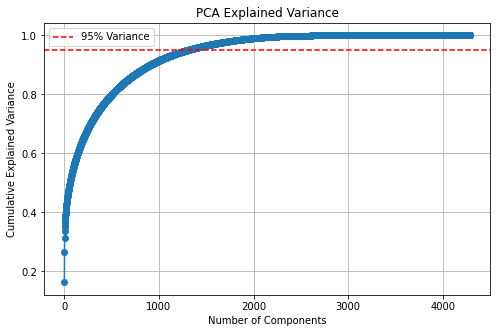

Optimal number of components for 95% variance: 1302


In [16]:
from sklearn.decomposition import PCA
pca = PCA()  # Adjust based on your dataset
pca.fit(X_train)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal number of components to retain at least 95% variance
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of components for 95% variance:", optimal_n_components)

In [18]:
pca = PCA(n_components=1302)  # Adjust based on your dataset
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
X_test_reduced = pca.transform(relevant_test_features_scaled_df)

In [19]:
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train_reduced, y_train, X_val_reduced, y_val, X_test=X_test_reduced, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 9.367752263856813
S-score: 1.4684583686309507
---------------------
XGBRegressor model - Test Set
Test RMSE: 16.09773540107567
Test score: 7.570902444504574
---------------------
RandomForestRegressor model - Validation Set
RMSE: 22.97397504470471
S-score: 12.75255682655423
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 35.90918069582564
Test score: 39.395923858505604
---------------------
MLPRegressor model - Validation Set
RMSE: 5.190437810780199
S-score: 27.684874328882874
---------------------
MLPRegressor model - Test Set
Test RMSE: 270.56460753807875
Test score: 20057092292035.19
---------------------
                   model   rmse_val    s_score   rmse_test    test_score
0           XGBRegressor   9.367752   1.468458   16.097735  7.570902e+00
1  RandomForestRegressor  22.973975  12.752557   35.909181  3.939592e+01
2           MLPRegressor   5.190438  27.684874  270.564608  2.005709e+13
